In [1]:
import tensorflow

In [1]:
import os
import numpy 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
mask = os.listdir('C:/Users/pvalb/Desktop/python/facemask/with_mask')
print (mask[0:5])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']


In [3]:
without_mask=os.listdir("C:/Users/pvalb/Desktop/python/facemask/without_mask")
print(without_mask[0:5])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']


In [4]:
len(mask),len(without_mask)

(3725, 3828)

In [5]:
mask_label=[1]*len(mask)
without_mask_label=[0]*len(without_mask)

In [6]:
print(mask_label[0:5],without_mask_label[0:5])

[1, 1, 1, 1, 1] [0, 0, 0, 0, 0]


In [7]:
labels=mask_label+without_mask_label
len(labels)

7553

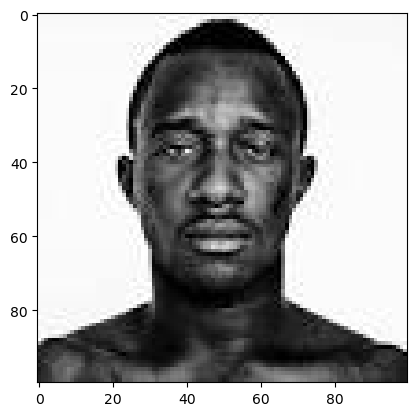

In [8]:
img=mpimg.imread("C:/Users/pvalb/Desktop/python/facemask/without_mask/without_mask_1.jpg")
imgplot=plt.imshow(img)
plt.show()

In [9]:
import numpy as np
m='C:/Users/pvalb/Desktop/python/facemask/with_mask/'
data=[]
for i in mask:
    image=Image.open(m + i)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)
    

n='C:/Users/pvalb/Desktop/python/facemask/without_mask/'
for i in without_mask:
    image=Image.open(n + i)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)

C:\Users\pvalb\anaconda3\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
len(data)

In [10]:
x=np.array(data)
y=np.array(labels)

In [11]:
x.shape

(7553, 128, 128, 3)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [13]:
x_train_scaled=x_train/255
x_test_scaler=x_test/255


In [14]:
import tensorflow as tf
from tensorflow import keras

In [15]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu' ))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten()) 
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1,activation='sigmoid'))


In [16]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [17]:
y_train.shape

(6042,)

In [18]:
history=model.fit(x_train_scaled,y_train,epochs=10,validation_split=0.1)

Epoch 1/10
170/170 [==============================] - 314s 2s/step - loss: 0.4597 - accuracy: 0.7865 - val_loss: 0.2968 - val_accuracy: 0.8843
Epoch 2/10
170/170 [==============================] - 266s 2s/step - loss: 0.2845 - accuracy: 0.8900 - val_loss: 0.2413 - val_accuracy: 0.9025
Epoch 3/10
170/170 [==============================] - 261s 2s/step - loss: 0.2427 - accuracy: 0.9062 - val_loss: 0.2076 - val_accuracy: 0.9207
Epoch 4/10
170/170 [==============================] - 259s 2s/step - loss: 0.2015 - accuracy: 0.9185 - val_loss: 0.1968 - val_accuracy: 0.9372
Epoch 5/10
170/170 [==============================] - 262s 2s/step - loss: 0.1746 - accuracy: 0.9367 - val_loss: 0.2648 - val_accuracy: 0.9058
Epoch 6/10
170/170 [==============================] - 276s 2s/step - loss: 0.1398 - accuracy: 0.9443 - val_loss: 0.2063 - val_accuracy: 0.9322
Epoch 7/10
170/170 [==============================] - 292s 2s/step - loss: 0.1204 - accuracy: 0.9527 - val_loss: 0.2665 - val_accuracy: 0.9223

In [20]:
loss,accuracy=model.evaluate(x_test_scaler,y_test)
accuracy

48/48 [==============================] - 23s 476ms/step - loss: 0.2097 - accuracy: 0.9351


0.9351422786712646

In [ ]:
im=input("Path of image")
image=Image.open(im)
image=image.resize((128,128))
image=image/255
image=np.reshape(image,[1,128,128,3])
input_prediction=model.predict(image)
ans=np.argmax(input_prediction)
if ans==1:
    print("maskm on")
else:
    print("no mask")
